# Regression : Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an Array and a degree and return an pandas where each column is the Array to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the Array column 2 is the Array squared and column 3 is the Array cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next we're going to write a polynomial function that takes an Array and a maximal degree and returns an pandas with columns containing the Array to all the powers up to the maximal degree.

The easiest way to apply a power to an Array is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power 

In [7]:
tmp = np.array([1., 2., 3.])
ts = pd.Series([1,2,3],index =['a','b','c']) # ndarray is can't covert using lambda because ndarray not has apply function
tmp_cubed = ts.apply(lambda x: x**3)
print (tmp)
print (tmp_cubed)

[1. 2. 3.]
a     1
b     8
c    27
dtype: int64


In [13]:
ss = tmp*[2]
ss.shape

(3,)

We can create an empty dataframe using pandas.DataFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty DataFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [14]:
tu=(tmp**4)
print (tu)

[ 1. 16. 81.]


In [15]:
ex_sframe = pd.DataFrame()
print (ex_sframe)
ex_sframe['power_1'] = tmp
print (ex_sframe)

Empty DataFrame
Columns: []
Index: []
   power_1
0      1.0
1      2.0
2      3.0


# Polynomial_dataframe function

Using the hints above complete the following function to create an dataFrame consisting of the powers of an Array up to a specific degree:

In [16]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_frame = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_frame['power_1']=feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        #for power in range(2, degree+1): 
         for power in range(1,degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_frame[name]=feature**power

    return poly_frame

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [17]:
tp3 = polynomial_frame(tmp, 3)
print (tp3.shape ,tp3 )

(3, 3)    power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [18]:
sales = pd.read_csv('kc_house_data.csv')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [20]:
sales = sales.sort_values(['sqft_living', 'price'] , axis = 0)
print(sales)

               id             date      price  bedrooms  bathrooms  \
19452  3980300371  20140926T000000   142000.0         0       0.00   
15381  2856101479  20140701T000000   276000.0         1       0.75   
860    1723049033  20140620T000000   245000.0         1       0.75   
18379  1222029077  20141029T000000   265000.0         0       0.75   
4868   6896300380  20141002T000000   228000.0         0       1.00   
21332  9266700190  20150511T000000   245000.0         1       1.00   
8623   6303400395  20150130T000000   325000.0         1       0.75   
11500  4322200105  20150331T000000   229050.0         1       1.00   
14466  7549801385  20140612T000000   280000.0         1       0.75   
465    8658300340  20140523T000000    80000.0         1       0.75   
1168   3523029041  20141009T000000   290000.0         2       0.75   
18052  1352300580  20141114T000000   247000.0         1       1.00   
12075  8655900162  20150219T000000   156000.0         1       0.75   
15248  1320069249  2

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [21]:
poly1_data = polynomial_frame(sales['sqft_living'], 1)
y = sales['price'] # add price to the data since it's the target

print (poly1_data )


       power_1
19452      290
15381      370
860        380
18379      384
4868       390
21332      390
8623       410
11500      420
14466      420
465        430
1168       440
18052      460
12075      470
15248      470
17394      480
8133       480
4203       490
4651       500
2141       520
3223       520
18059      520
2930       520
6779       520
9641       520
12484      530
3582       530
7017       530
14450      540
12757      540
18508      550
...        ...
12872     6980
15482     7000
7035      7050
4149      7080
7907      7100
21050     7120
6501      7220
21506     7270
18594     7320
2713      7350
1315      7390
10373     7400
11871     7420
12370     7440
4024      7480
14032     7620
18477     7710
16773     7730
19858     7850
13411     7880
1448      8000
1164      8010
18302     8020
14556     8670
4411      9200
8092      9640
9254      9890
3914     10040
7252     12050
12777    13540

[21613 rows x 1 columns]


In [22]:
# since y is price 
y = pd.DataFrame(y,columns=['price'])
print ('y data ',  y)

y data             price
19452   142000.0
15381   276000.0
860     245000.0
18379   265000.0
4868    228000.0
21332   245000.0
8623    325000.0
11500   229050.0
14466   280000.0
465      80000.0
1168    290000.0
18052   247000.0
12075   156000.0
15248   192500.0
17394   145000.0
8133    170000.0
4203    150000.0
4651    125000.0
2141     82500.0
3223    262000.0
18059   275000.0
2930    295000.0
6779    310000.0
9641    330000.0
12484   238000.0
3582    355000.0
7017    400000.0
14450   345000.0
12757   425000.0
18508   115000.0
...          ...
12872  3100000.0
15482  3200000.0
7035   3800000.0
4149   4000000.0
7907   3200000.0
21050   900000.0
6501   1940000.0
21506  2238890.0
18594  1135250.0
2713   1110000.0
1315   5300000.0
10373  2983000.0
11871  1950000.0
12370  4208000.0
4024    800000.0
14032  1680000.0
18477  3300000.0
16773  1920000.0
19858  2700000.0
13411  2415000.0
1448   5350000.0
1164   5110800.0
18302  3300000.0
14556  2888000.0
4411   5570000.0
8092   4668000.0
9254  

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly1_data , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#let's take a look at the weights before we plot
model.coef_

array([[280.6235679]])

In [29]:
model.intercept_

array([-43580.74309447])

In [34]:
p1 = model.predict(poly1_data)
print(p1)

[[  37800.09159579]
 [  60249.97702758]
 [  63056.21270656]
 ...
 [2773879.87859591]
 [3337933.25006978]
 [3756062.36623698]]


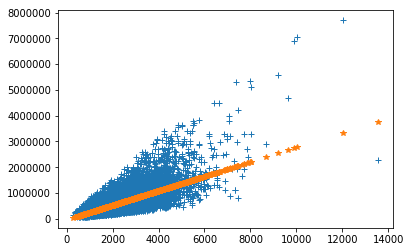

In [35]:
plt.plot(poly1_data['power_1'],y['price'],'+',
                poly1_data['power_1'], model.predict(poly1_data),'*')

Let's unpack that plt.plot() command. The first pair of Arrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.' or '+'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-' or '*'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [36]:
poly2_data = polynomial_frame(sales['sqft_living'], 2)
my_features = poly2_data.columns # get the name of the features
print (my_features)

# add price to the data since it's the target
model1 = LinearRegression()
model1.fit(poly2_data , y)


Index(['power_1', 'power_2'], dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
model1.coef_

array([[6.79940947e+01, 3.85812609e-02]])

In [38]:
model1.intercept_

array([199222.27930548])

In [40]:
p2 = model1.predict(poly2_data)
print(p2)

[[ 222185.25080918]
 [ 229661.86896153]
 [ 230631.16936542]
 ...
 [4770935.8224383 ]
 [6620646.66150335]
 [8193026.61898585]]


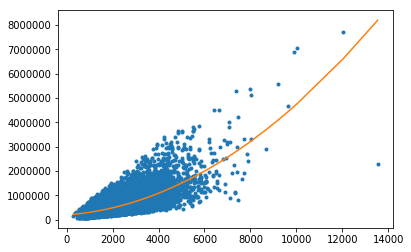

In [41]:
plt.plot(poly2_data['power_1'],y['price'],'.',
        poly2_data['power_1'], model1.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [42]:
poly3_data = polynomial_frame(sales['sqft_living'], 3)
my_features3 = poly3_data.columns # get the name of the features
print (my_features3)
model2 = LinearRegression()
model2.fit(poly3_data , y)


Index(['power_1', 'power_2', 'power_3'], dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
model2.coef_

array([[-9.01819864e+01,  8.70465089e-02, -3.84055260e-06]])

In [44]:
model2.intercept_

array([336819.74822146])

In [45]:
p3 = model2.predict(poly3_data)
print(p3)

[[ 317893.91631044]
 [ 315174.54478916]
 [ 314909.37044974]
 ...
 [4318996.1477674 ]
 [5169720.55468118]
 [5540689.79210763]]


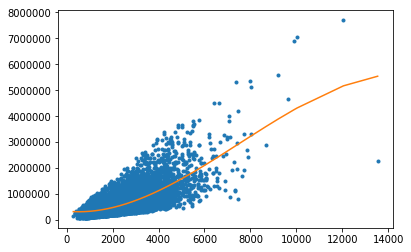

In [46]:
#model3.get('coefficients')
plt.plot(poly3_data['power_1'],y['price'],'.',
       poly3_data['power_1'], model2.predict(poly3_data),'-')

Now try a 15th degree polynomial:

In [47]:
poly15_data=polynomial_frame(sales['sqft_living'],15)
#print poly15_data
my_features15=poly15_data.columns
print (my_features15)
model15 = LinearRegression()
model15.fit(poly15_data , y)

Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
model15.coef_

array([[ 1.71289488e-05,  4.21890991e-02,  4.60100653e-06,
        -4.52583777e-10, -2.28420214e-14, -2.19109097e-16,
        -5.24796523e-16,  3.49221476e-16, -2.01148770e-16,
        -2.67950411e-16,  1.00544363e-16,  7.25571766e-16,
         4.19356250e-16, -4.03452461e-16,  4.79205036e-17]])

In [49]:
model15.intercept_

array([279926.67310561])

In [50]:
p15 = model15.predict(poly15_data)
print(p15)

[[ 289983.35114851]
 [ 286490.0913175 ]
 [ 276185.76890585]
 ...
 [4783691.98592392]
 [5020595.26267293]
 [4358827.89595902]]


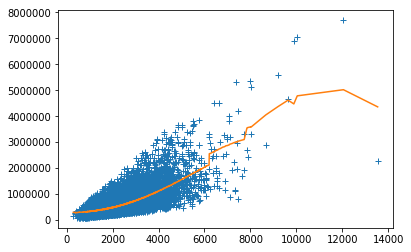

In [51]:
#model15.get('coefficients')
plt.plot(poly15_data['power_1'],y['price'],'+',
        poly15_data['power_1'],model15.predict(poly15_data),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [53]:
# remove id date ,and price from input data 
x = pd.DataFrame(sales.drop(['id','price','date'] ,axis =1))
print(x.shape ,y.shape )
print(x ,y)

(21613, 18) (21613, 1)
       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
19452         0       0.00          290     20875     1.0           0     0   
15381         1       0.75          370      1801     1.0           0     0   
860           1       0.75          380     15000     1.0           0     0   
18379         0       0.75          384    213444     1.0           0     0   
4868          0       1.00          390      5900     1.0           0     0   
21332         1       1.00          390      2000     1.0           0     0   
8623          1       0.75          410      8636     1.0           0     0   
11500         1       1.00          420      3298     1.0           0     0   
14466         1       0.75          420      6720     1.0           0     0   
465           1       0.75          430      5050     1.0           0     0   
1168          2       0.75          440      8313     1.0           1     3   
18052         1       1.00   

In [54]:
from sklearn.model_selection import train_test_split
x_train1,x_test1 ,y_train1 , y_test1 = train_test_split(x , y , test_size=.5,random_state=40)
x_train2,x_test2 ,y_train2 , y_test2=train_test_split(x_train1 , y_train1 , test_size=.5,random_state=40)
x_train3,x_test3 ,y_train3 , y_test3=train_test_split(x_test1 , y_test1 , test_size=.5,random_state=40)


Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [55]:
poly15_set1_data=polynomial_frame(x_train1['sqft_living'],15)
my_features_set1=poly15_set1_data.columns
print(my_features_set1)
from sklearn.linear_model import LinearRegression

model15_set1 = LinearRegression()
model15_set1 .fit(poly15_set1_data , y_train1)

Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
model15_set1.coef_

array([[ 2.22499935e-05,  4.67549638e-02,  4.68906745e-06,
        -6.19287723e-10, -3.46986340e-14,  3.96535877e-16,
        -7.43370696e-16,  8.81370570e-16,  2.38597972e-16,
        -3.67064736e-16,  5.12438296e-16,  6.07492603e-16,
         3.79499453e-16,  2.07545872e-16, -6.50991087e-16]])

In [58]:
model15_set1.intercept_

array([267304.27008295])

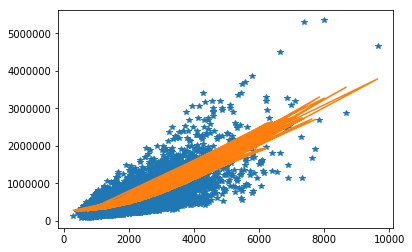

In [60]:
plt.plot(poly15_set1_data['power_1'],y_train1['price'],'*',
        poly15_set1_data['power_1'],model15_set1.predict(poly15_set1_data),'-')

In [61]:
poly15_set2_data=polynomial_frame(x_train2['sqft_living'],15)
my_features_set2=poly15_set2_data.columns
print(my_features_set2)

model15_set2 = LinearRegression()
model15_set2.fit(poly15_set2_data , y_train2)

Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
model15_set2.coef_

array([[ 2.15246769e-05,  4.58301094e-02,  4.32642921e-06,
        -4.71373019e-10, -3.60803933e-14,  5.47880224e-16,
        -1.08993906e-15,  5.55643429e-16,  4.63159757e-16,
        -3.21078088e-16,  7.41949248e-16,  1.37829640e-15,
        -1.48054907e-17,  9.15245222e-16,  1.33841540e-16]])

In [63]:
model15_set2.intercept_

array([268285.52841473])

In [64]:

p15_2 = model15_set2.predict(poly15_set2_data)
print(p15_2)

[[ 630724.92254562]
 [ 545298.61231609]
 [ 299875.90725853]
 ...
 [ 924090.90001668]
 [ 544721.68715228]
 [1235826.25655191]]


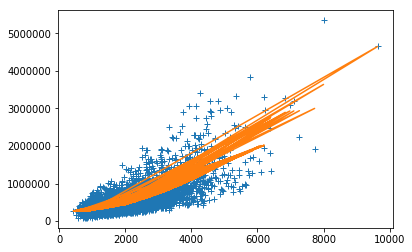

In [67]:
plt.plot(poly15_set2_data['power_1'],y_train2['price'],'+')
plt.plot(poly15_set2_data['power_1'],model15_set2.predict(poly15_set2_data),'-')

In [68]:
poly15_set3_data=polynomial_frame(x_train3['sqft_living'],15)
my_features_set3=poly15_set3_data.columns
print(my_features_set1)

model15_set3 =LinearRegression()
model15_set3.fit(poly15_set3_data , y_train3)


Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
       'power_13', 'power_14', 'power_15'],
      dtype='object')


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
model15_set3.coef_

array([[ 2.11309354e-05,  5.01238480e-02,  4.33534337e-08,
         3.25010168e-11,  1.85362360e-14, -2.19526373e-16,
        -4.70870206e-16, -3.20976881e-16, -9.42381361e-17,
         7.05567899e-18, -5.10365429e-16,  7.43889531e-16,
         3.45372215e-16, -5.19557413e-16,  2.79173651e-16]])

In [70]:
model15_set3.intercept_

array([274201.75019299])

In [72]:
p15_3 = model15_set3.predict(poly15_set3_data)
print(p15_3)

[[366860.51051634]
 [398427.12276434]
 [343359.01546921]
 ...
 [366336.80976635]
 [415632.15626027]
 [550590.01815168]]


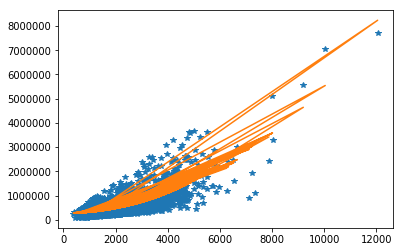

In [73]:
plt.plot(poly15_set3_data['power_1'],y_train3['price'],'*',
        poly15_set3_data['power_1'],model15_set3.predict(poly15_set3_data),'-')

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [74]:

x_training_and_validation, x_testing , y_training_and_validation,y_testing = train_test_split(x, y , test_size = 0.9, random_state =40)
x_training, x_validation , y_training ,y_validation = train_test_split(x_training_and_validation, y_training_and_validation, test_size =0.5, random_state=40)


Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [91]:
def get_residuals_sum_of_squares(model,data,output):
    predictions=model.predict(data)
    res=output-predictions
    RSS=(res*res).sum()
    return RSS #, predictions

In [92]:
for degree in range(1,15+1):
    poly_train=polynomial_frame(x_training['sqft_living'],degree)
    my_features=poly_train.columns
    print (my_features)

    model_valid1 =LinearRegression()
    model_valid1.fit(poly_train , y_training)

    poly_valid=polynomial_frame(x_validation['sqft_living'],degree)
    

    #print(degree, get_residuals_sum_of_squares(model2,poly_valid,validation['price']))
    print(degree, get_residuals_sum_of_squares(model_valid1,poly_valid,y_validation))

Index(['power_1'], dtype='object')
1 price    6.161006e+13
dtype: float64
Index(['power_1', 'power_2'], dtype='object')
2 price    6.777314e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3'], dtype='object')
3 price    9.060331e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4'], dtype='object')
4 price    2.424479e+14
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5'], dtype='object')
5 price    8.189583e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6'], dtype='object')
6 price    8.179490e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7'],
      dtype='object')
7 price    8.172514e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
       'power_7', 'power_8'],
      dtype='object')
8 price    8.116831e+13
dtype: float64
Index(['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
 

In [93]:
p_v = model_valid1.predict(poly_valid)
print(p_v)

[[ 403363.90416012]
 [ 438464.04968276]
 [ 400052.17166577]
 ...
 [ 431517.38065896]
 [1464222.0860009 ]
 [ 400052.17166577]]


In [94]:
print(model_valid1.coef_ ,'\n', model_valid1.intercept_)

[[ 1.34101926e-05  2.30080393e-02  1.18138912e-05 -8.25092083e-10
  -1.18600271e-13 -6.38892903e-16 -3.78250529e-16  2.65765720e-15
   2.05878019e-15  1.11696100e-16 -5.13661370e-17  8.61849331e-16
   1.79725804e-15 -3.98170244e-16 -2.38090756e-15]] 
 [299953.67318408]


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [95]:
8

8

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [96]:
poly_frame= polynomial_frame(x_training['sqft_living'], 8)
my_features = poly_frame.columns
y8 = y_training['price']
model_8 = LinearRegression()
model_8.fit(poly_frame,y8)
model_8.coef_


array([ 1.49596396e-05,  2.57259154e-02,  1.07929956e-05, -7.29895389e-10,
       -1.17087789e-13, -4.55030375e-16, -3.58583386e-16,  2.56871505e-15])

In [97]:
poly_test_frame = polynomial_frame(x_testing['sqft_living'], 8)
print (get_residuals_sum_of_squares(model_6, poly_test_frame, y_testing['price']))

1303626033250476.2
